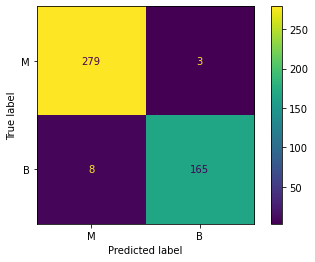

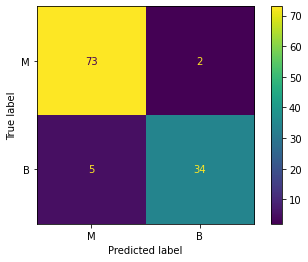

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
data = pd.read_csv("breast_cancer.xls")
data = data.values
x = data[:, 2:-2]
y = data[:, 1:2]
ct = ColumnTransformer([("", OneHotEncoder(), [0])], remainder="passthrough")
y = ct.fit_transform(y)
y = y[:, 1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)
svn_classifier = SVC(kernel="linear")
svn_classifier.fit(x_train, y_train)
y_train_pred = svn_classifier.predict(x_train)
y_test_pred = svn_classifier.predict(x_test)
cm = confusion_matrix(y_train, y_train_pred)
dis = ConfusionMatrixDisplay(cm, display_labels=["M", "B"])
dis.plot()
cm = confusion_matrix(y_test, y_test_pred)
dis = ConfusionMatrixDisplay(cm, display_labels=["M", "B"])
dis.plot()
